# Quantitative Risk Assessment - TNO Site

# Background
Recently completed large risk analysis study for entire site.  Study was performed by contract company, BakerRisk.

Analyzed potential release scenarios to determine potential severity of each event (in terms of number of injuries)


Injuries Modeled for Personnel in Occupied Buildings.

The model predicts probability of personnel injury inside of a building due to fire, toxic, and blast scenarios.

*Number of injuries in a building is estimated by (probability of injury) $*$ (building occupancy)*

## Quantifying Risk

Risk is quantified by the relationship between consequence *(number of injuries)* and the frequency of an event *(toxic release, fire, explosion)*

Corporations will specify a Risk criteria for tolerable frequencies of event magnitudes, e.g. **1 injury per 10,000 years**, or **1e-5 injuries per year**.

### F-N Curves
BakerRisk provided "F-N" Curves, which plot cumulative frequency of events that result in N or more injuries.

An F-N Curve was provided for each building.  The below example is based on simulated, random data.

![FN Curve](img/fncurve.png)

 - The red and green lines are targets specified by [UK HSE](http://www.hse.gov.uk/research/rrpdf/rr703.pdf).
 - The bottom-right point represents one scenario of magnitude ~1e-7 with a consequence of ~200 injuries.
 - The point directly above it is for another scenario with similar consequence (slightly less than the first) and similar frequency.  
     - The frequency of this second event is summed to that of the first, and the cumulative frequency and num of injuries of the second point is plotted as this second point.
     - The y-value of this second point reflects the total frequency of events of that result in the x-value of **N or more** injuries.  
     - The assumption is that events are mutually exclusive, so this is the potential frequency of event1 **or** event2.
         - Event1 results in a certain number of injuries.  
         - Event2 results in slightly less injuries than event1.
         - The cumulative frequency represents the frequency of either event occuring, and plots the potential conseqeucnes of each event.

## Problems

1. BakerRisk provides all data in spreadsheets.
    - In one spreadsheet, there are tabs for each occupied building.
    - Each tab contains rows for impact on a building from 1000+ scenarios.
    - Querying data to one tab -> ~1,000,000 rows.  
    - Attempting to filter data and regenerate F-N Curves based on modifying inputs takes > 15 minutes and will often crash Excel.
    - Attempting to build F-N curves for different units (department, division, sitewide, etc.) is nearly impossible in Excel given the memory constraints, etc.
   
   
2. Querying the data to Power BI has presented some issues as well (may be related to my novice level of experience)
    - Preliminary model result data has been queried from Excel and loaded into Power BI.
    - There were a lot of blank rows that copied over.  I want to ensure that I have the query set up properly when receiving actual data.
    - Calculating a cumulative frequency measure has been an issue.
    - Using the "Python visual" with pandas can calculate cumulative frequency, but the plotting appears in error.
        - The plotted cumulative frequency is much lower than the actual cumulative frequency.  
        - This may be due to memory limitations.  Hopefully a more powerful workstation will have better luck.


3. Scenarios are identified with "ProjectPhase-ProductionBuildingNumber-ScenarioIdentifier-Hole Size[-Other Info]"
    - Once BakerRisk has provided all data, I will need to build a link to the chemical/mixture for each scenario.
    - Having an understanding of what chemicals are being released will allow us to filter on specific chemicals to assess their risk contribution.
    - There will be some other associated tables that could be built to help with assessing changes to risk.
        - More than wanting to discuss here.

**For now, (1) getting the FN Curve "Cumulative Frequency" calculation working in Power BI and (2) ensuring the query is set up ok would be phenomenal**

## Generating an FN Curve for Testing
If you would like to test buiding an FN curve from random data, here is a simple Python script

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#studying impact from multiple scenarios to occupants of B280, West Wing.

#number of simulated scenarios impacting B280West.
n=100

#get random frequencies of loss of containment scenarios (bet 1e-12 and 5e-7)
frequencies = np.random.randint(low=1, high=500000, size=n)/1e12

print(frequencies)

[1.18601e-07 1.74474e-07 3.86425e-07 3.84527e-07 3.52501e-07 4.67226e-07
 1.00276e-07 1.72033e-07 4.92820e-07 4.39534e-07 6.00730e-08 2.69686e-07
 4.49911e-07 1.80259e-07 4.02659e-07 4.74009e-07 1.72908e-07 1.35897e-07
 1.74264e-07 1.79627e-07 4.46625e-07 6.68380e-08 6.02660e-08 1.88675e-07
 3.46700e-09 1.65093e-07 1.25683e-07 1.73160e-07 2.75501e-07 1.57248e-07
 7.93430e-08 3.21571e-07 1.23001e-07 4.04932e-07 3.44028e-07 1.80546e-07
 2.08907e-07 4.39767e-07 1.13219e-07 4.33890e-07 4.31110e-08 2.96500e-09
 2.17659e-07 3.26345e-07 2.87532e-07 1.92049e-07 1.38933e-07 2.78523e-07
 3.32970e-08 2.00911e-07 8.12070e-08 3.44978e-07 1.69809e-07 4.22335e-07
 3.69060e-07 1.79507e-07 8.80710e-08 3.66142e-07 2.61214e-07 1.54847e-07
 3.52119e-07 3.51318e-07 4.37221e-07 3.76710e-07 1.35983e-07 4.32458e-07
 4.54039e-07 1.09443e-07 1.68317e-07 1.97674e-07 3.24085e-07 3.99525e-07
 4.34360e-07 2.08546e-07 3.37311e-07 2.68710e-08 8.01820e-08 3.79326e-07
 4.56371e-07 3.02313e-07 8.80940e-08 4.69574e-07 4.

### *The values above are the estimated frequencies of each of the simulated scenarios that impact B280West.*

In [3]:
#get a normal distribution of probabilities of injury to associate with a loss of containment.  
#project the distribution between 0 and 1.

injuryprob=np.random.normal(loc=0.5,scale=1.0,size=n)
minval = min(injuryprob)
maxval = max(injuryprob)
injuryprob -= minval
injuryprob /= (maxval-minval)


In [4]:
#scale probability by occupancy -> estimate number of injuries
b280WestOccupancy=200
numinjuries=np.around(b280WestOccupancy * injuryprob)
print(numinjuries)

[142.  73. 123. 114.  47.  72. 125.   8. 175.  33. 110. 109.   0. 140.
 125. 181.  49. 169. 148.  55. 167. 146.  77.  13. 119.  84.  94. 111.
  84.  87.  27.   6.  14. 175.  92. 147.  72.  97.  94.  58.  54. 158.
  81. 105. 129. 200.  38.  82.  40. 133.  38. 152. 155.  49. 104.  67.
  31. 102.  82. 113. 122. 141. 148.  86. 158. 173. 101. 159. 181.  75.
  49.  83.  59.  62. 138.  81.  79.  66. 110. 128.  77.  96. 146. 114.
  64.  84. 117.  91. 111. 105.  78. 138.  30.  63.   9. 156.  54.  67.
 121.  68.]


### *The values above are the associated number of injuries that are modeled as the consequence of each release scenario. Again, these are the impacts to B280West from each simulated scenario.*

In [7]:
#load to dataframe and sort by largets to smallest num of injuries from each scenario.
df = pd.DataFrame({'f':frequencies, 'n':numinjuries})

df = df.sort_values(['n', 'f'], ascending=[False, True])

df.head()


,f,n
45,1.920490e-07,200.0
68,1.683170e-07,181.0
15,4.740090e-07,181.0
33,4.049320e-07,175.0
8,4.928200e-07,175.0


### *Each row in the table above is for a scenario that impacts B280West. The 'f' column is the frequency of each scenario, and 'n' is the number of injuries*

In [9]:
#Add column for cumulative sum of frequency

df['fcum'] = df['f'].cumsum()

df.head()


,f,n,fcum
45,1.920490e-07,200.0,1.920490e-07
68,1.683170e-07,181.0,3.603660e-07
15,4.740090e-07,181.0,8.343750e-07
33,4.049320e-07,175.0,1.239307e-06
8,4.928200e-07,175.0,1.732127e-06


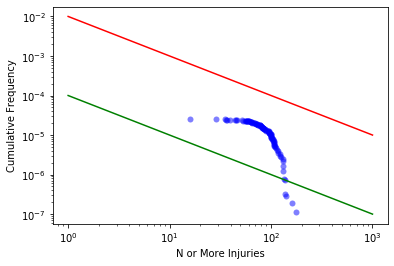

In [27]:
#plot exceedence on log-log scale

fig = plt.figure()
ax = plt.gca()
ax.plot(df['n'] ,df['fcum'], 'o', c='blue', alpha=0.5, markeredgecolor='none')
ax.plot([1, 10, 1000], [0.01, 0.001, 0.00001], c = 'red')
ax.plot([1, 10, 1000], [0.0001, 0.00001, 0.0000001], c = 'green')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('N or More Injuries')
plt.ylabel('Cumulative Frequency')

plt.show()

## Issues with Generating F-N Curve in Power BI

When inside of Power BI, running the same test script as above works ok, and generates the following plot:

![Power BI Test FN Curve](img/fncurvebi.png)

Power BI's plotting seems to break down when dealing with the large, real dataset.  The plot that is generated does not reflect the real data.  The cumulative sum calculated on F in Python is several orders of magnitude below the actual cumulative sum.


The code below is the implemented script in Power BI's "Python visual":

```python
import matplotlib.pyplot as plt
dataset = dataset.sort_values(['Content.N', 'Content.F'], ascending=[False, True])
dataset['fcum'] = dataset['Content.F'].cumsum()

fig = plt.figure()
ax = plt.gca()
ax.plot(dataset['Content.N'] ,dataset['fcum'], 'o', c='blue', alpha=0.5, markeredgecolor='none')
ax.plot([1, 10, 1000], [0.01, 0.001, 0.00001], c = 'red')
ax.plot([1, 10, 1000], [0.0001, 0.00001, 0.0000001], c = 'green')
ax.set_yscale('log')
ax.set_xscale('log')

plt.show()

```

I received some guidance on calculating cumulative sum as a measure, but I couldn't get it to work appropriately.  The direction was to use a line graph, and calculate with something similar to the following (I have since lost his original recommended code):

```
Cumulative value =      
	CALCULATE (      
	   sum([value]),      
	   FILTER (      
	      ALL ( Sheet1[Frequency] ),      
	      Sheet1[Frequency] <= MAX ( Sheet1[Frequency] )  
	   )    
	) 
```

I'm unsure if it would have ever given a correct value, as it calculated for an hour and returned an "Exceeded Resources" error.
